In [1]:
%cd ..
import microwave.data_analysis.ppscore as pps
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import pandas as pd
import numpy as np

c:\Users\Edouard\Documents\Git\microwave


c:\Users\Edouard\Documents\Git\microwave\.venv_microwave\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
df = pd.DataFrame(np.random.randint(0,3,size=(15, 4)), columns=list('ABCD'))
df['E'] = df['B']
df

A  B  C  D  E
0   0  2  1  0  2
1   1  0  1  0  0
2   2  0  1  0  0
3   0  1  0  0  1
4   1  0  1  1  0
5   0  0  2  0  0
6   0  0  2  1  0
7   0  1  1  1  1
8   2  0  1  1  0
9   2  2  2  0  2
10  2  0  1  2  0
11  1  0  1  2  0
12  2  1  0  2  1
13  1  2  1  2  2
14  2  1  0  0  1

In [3]:
pps.score(df['A'], df['B'], metric=mean_squared_error, model=DecisionTreeRegressor())

ppscore        case              metric  perfect_score  naive_score  \
0  0.128681  regression  mean_squared_error            0.0     1.066667   

   model_score                  model  
0     0.929407  DecisionTreeRegressor

In [4]:
pps.predictors(df, df['A'], metric=mean_squared_error, model=DecisionTreeRegressor())

x  ppscore        case              metric  perfect_score  naive_score  \
0  A      1.0  regression  mean_squared_error            0.0     0.733333   
1  B      0.0  regression  mean_squared_error            0.0     0.733333   
2  C      0.0  regression  mean_squared_error            0.0     0.733333   
3  D      0.0  regression  mean_squared_error            0.0     0.733333   
4  E      0.0  regression  mean_squared_error            0.0     0.733333   

   model_score                  model  
0     0.000000  DecisionTreeRegressor  
1     1.211852  DecisionTreeRegressor  
2     1.109609  DecisionTreeRegressor  
3     0.866667  DecisionTreeRegressor  
4     1.211852  DecisionTreeRegressor

In [5]:
pps_mat = pps.matrix(df, metric=mean_squared_error, model=DecisionTreeRegressor())
pps_mat

x  y   ppscore        case              metric  perfect_score  \
0   B  E  1.000000  regression  mean_squared_error            0.0   
1   E  B  1.000000  regression  mean_squared_error            0.0   
2   A  B  0.197917  regression  mean_squared_error            0.0   
3   A  E  0.197917  regression  mean_squared_error            0.0   
4   E  C  0.197279  regression  mean_squared_error            0.0   
5   B  C  0.197279  regression  mean_squared_error            0.0   
6   D  B  0.154167  regression  mean_squared_error            0.0   
7   D  E  0.154167  regression  mean_squared_error            0.0   
8   C  B  0.134706  regression  mean_squared_error            0.0   
9   C  E  0.134706  regression  mean_squared_error            0.0   
10  C  A  0.000000  regression  mean_squared_error            0.0   
11  B  A  0.000000  regression  mean_squared_error            0.0   
12  E  A  0.000000  regression  mean_squared_error            0.0   
13  D  A  0.000000  regression  mean_squared_error            0.0   
14  D  C  0.000000  regression  mean_squared_error            0.0   
15  A  C  0.000000  regression  mean_squared_error            0.0   
16  E  D  0.000000  regression  mean_squared_error            0.0   
17  C  D  0.000000  regression  mean_squared_error            0.0   
18  B  D  0.000000  regression  mean_squared_error            0.0   
19  A  D  0.000000  regression  mean_squared_error            0.0   

    naive_score  model_score                  model  
0      1.066667     0.000000  DecisionTreeRegressor  
1      1.066667     0.000000  DecisionTreeRegressor  
2      1.066667     0.855556  DecisionTreeRegressor  
3      1.066667     0.855556  DecisionTreeRegressor  
4      0.400000     0.321088  DecisionTreeRegressor  
5      0.400000     0.321088  DecisionTreeRegressor  
6      1.066667     0.902222  DecisionTreeRegressor  
7      1.066667     0.902222  DecisionTreeRegressor  
8      1.066667     0.922980  DecisionTreeRegressor  
9      1.066667     0.922980  DecisionTreeRegressor  
10     0.733333     1.219813  DecisionTreeRegressor  
11     0.733333     1.210204  DecisionTreeRegressor  
12     0.733333     1.210204  DecisionTreeRegressor  
13     0.733333     1.200963  DecisionTreeRegressor  
14     0.400000     0.549704  DecisionTreeRegressor  
15     0.400000     0.550000  DecisionTreeRegressor  
16     0.733333     1.107861  DecisionTreeRegressor  
17     0.733333     1.070089  DecisionTreeRegressor  
18     0.733333     1.107861  DecisionTreeRegressor  
19     0.733333     1.096296  DecisionTreeRegressor

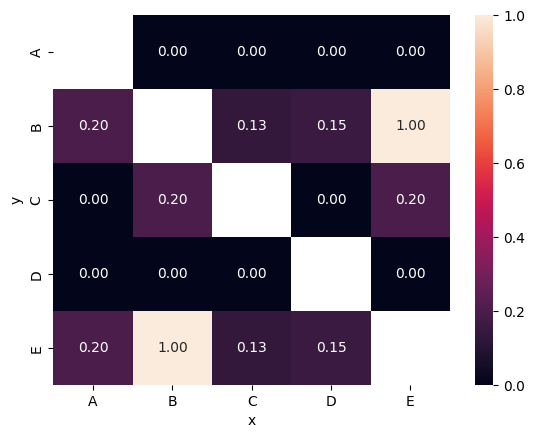

In [6]:
mat = pps_mat[["x", "y", "ppscore"]].pivot(columns='x', index='y', values='ppscore')
_ = sns.heatmap(mat,annot=True,fmt=".2f")

In [7]:
pps.mutual_predictors(pps_mat, threshold=0.9)

['B', 'E']